In [1]:
import tensorflow as tf
import keras
import numpy as np
import time
import random

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, LSTM, GRU, SimpleRNN, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from collections import deque


from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.models import model_from_json


import qkeras
from qkeras import *

import hls4ml
import plotting

2022-04-20 15:51:14.822848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/gcc/lib64:/inteltools/altera/21.1.0.169.pro/hls/host/linux64/lib
2022-04-20 15:51:14.822866: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/atlas/bonnet/hls4ml/hls4ml/hls4ml/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [2]:
data_input_x = np.linspace(-5, 5, 100000) 
data_output_y = np.sin(data_input_x)

print(data_input_x)

[-5.     -4.9999 -4.9998 ...  4.9998  4.9999  5.    ]


Loaded model from disk


2022-04-20 15:51:28.643738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/gcc/lib64:/inteltools/altera/21.1.0.169.pro/hls/host/linux64/lib
2022-04-20 15:51:28.643818: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 15:51:28.643901: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marsattack3): /proc/driver/nvidia/version does not exist
2022-04-20 15:51:28.644639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other 

Interpreting Sequential
Topology:
Layer name: dense_input, layer type: Input
Layer name: dense, layer type: Dense
  -> Activation (sigmoid), layer name: dense
Layer name: dense_1, layer type: Dense
  -> Activation (linear), layer name: dense_1
Interpreting Sequential
Topology:
Layer name: dense_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: dense, layer type: Dense, input shapes: [[None, 1]], output shape: [None, 5]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 5]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
{'Model': {'Precision': 'ac_fixed<36,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'dense_input': {'Precision': {'result': 'ac_fixed<36,6>'}}, 'dense': {'Precision': {'weight': 'ac_fixed<36,6>', 'bias': 'ac_fixed<36,6>', 'result': 'ac_fixed<36,6>'}, 'ReuseFactor': 1}, 'dense_sigmoid': {'Precision': 'ac_fixed<36,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'

<Figure size 432x288 with 0 Axes>

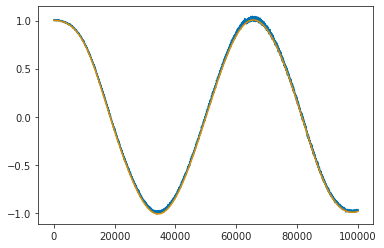

<Figure size 432x288 with 0 Axes>

In [10]:

conf = hls4ml.utils.config_from_keras_model(loaded_model, granularity='name', default_precision='ac_fixed<36,6>')

hls_model = hls4ml.converters.convert_from_keras_model(loaded_model,
                                                        hls_config=conf,
                                                        output_dir='models/hls_models',
                                                        part='1SG280HU2F50E2VG',
                                                        backend='Quartus')


hls_model.compile()
print (conf)
y_hls = hls_model.predict(data_input_x.reshape(data_input_x.shape[0],1))
y_true = loaded_model.predict(data_input_x)
plt.figure()
plt.plot(y_hls)
plt.plot(y_true)
print(y_hls)

plt.figure()


#print('ytrue',y_true)
#y_nemer = open('model_and_weight/tb_data/results.log', 'r')

#plt.plot(list(map(y_nemer)))



{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 
'LayerName': {'dense_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 
              'dense': {'Precision': {'weight': 'ap_fixed<4,5>', 'bias': 'ap_fixed<4,5>', 'result': 'ap_fixed<16,6>'}, 'ReuseFactor': 1}, 
              'dense_relu': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'}, 
              'dense_1': {'Precision': {'weight': 'ap_fixed<4,5>', 'bias': 'ap_fixed<4,5>', 'result': 'ap_fixed<16,6>'}, 'ReuseFactor': 1}, 
              'dense_1_linear': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'}}}